# Time-Frequency Analysis

In this section we will discuss the representation of signals in time and frequency domain and how it can be useful for analysis.

## Fourier Series Expansion

Let's revisit the sine wave example. It can be represented by its amplitude, frequency, and phase. 


A periodic signal can be decomposed into a sum of sine waves with different amplitudes, frequencies, and phases. For example, below is a decomposition of a square wave.

$$\textrm{square wave} = sin(x) + sin(3x)/3 + sin(5x)/5 + sin(7x)/7 ...$$

![](https://upload.wikimedia.org/wikipedia/commons/b/bd/Sigma-approximation_of_a_Square_Wave_.gif)



Image Source: Wikipedia

The representation can be obtained by calculating the [**Fourier Series**](https://mathworld.wolfram.com/FourierSeries.html) for the function. 

## Fourier Transform

The analogue for this representation for discrete signals can be obtained through the **Discrete Fourier Transform**.


$$ \mathcal{\hat{f}}[k] = \sum_{n=0}^{N-1}e^{-2\pi j \frac{kn}{N}}f[n] $$

This converts the signal from the time domain to frequency domain.

:::{note}
We can interpret it as a matched filter against waves with different frequencies.
:::

### Sine Wave Frequency Representation Example

In [76]:
import numpy as np
import scipy as sp
from scipy import signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

In [64]:
# Sine Wave
freq = 100
N = 1000
end_time = 1
time = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
A = 1
cw = A*np.sin(2*np.pi*freq*time)

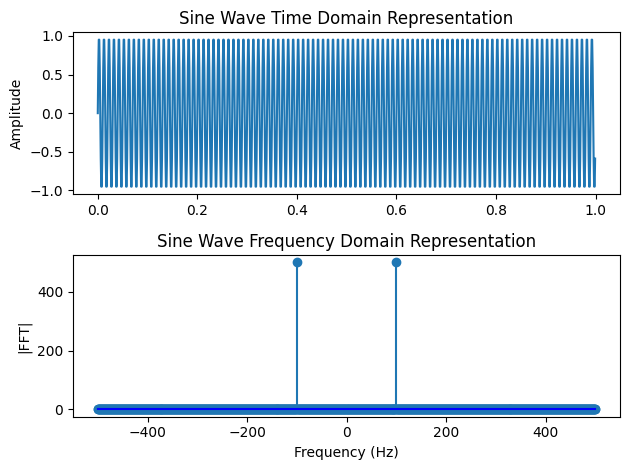

In [69]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(time, cw)
ax1.title.set_text("Sine Wave Time Domain Representation")
ax1.set_ylabel("Amplitude")
fig.tight_layout()

ax2.stem(fftfreq(N, 1)*N, np.abs(fft(cw)), basefmt='b-')
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("|FFT|")
ax2.title.set_text("Sine Wave Frequency Domain Representation")
fig.tight_layout()

:::{note}
The FFT is symmetric and the maximum positive frequency is half the sampling frequency (within which we can accurately reconstruct the signal thanks to the [Nyquist-Shannon Sampling Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)). We can limit to display only one side of the plot.
:::

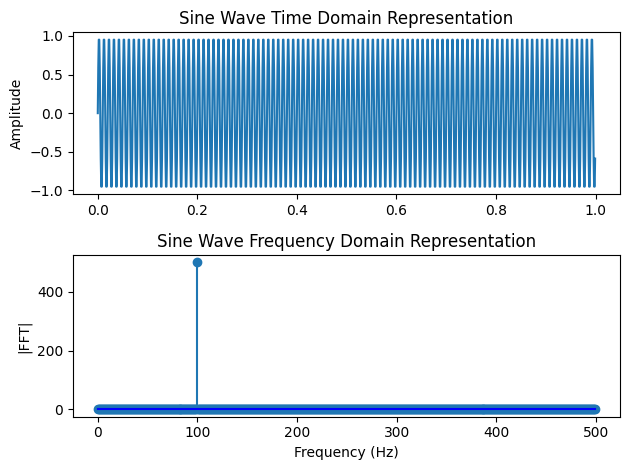

In [87]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(time, cw)
ax1.title.set_text("Sine Wave Time Domain Representation")
ax1.set_ylabel("Amplitude")
fig.tight_layout()

ax2.stem(N*fftfreq(N, 1)[:np.round(N//2)], np.abs(fft(cw))[:(N//2)], basefmt='b-')
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("|FFT|")
ax2.title.set_text("Sine Wave Frequency Domain Representation")
fig.tight_layout()

:::{note}
We can see that the only npn-zero frequency is 100Hz, the frequency of the sine wave.
:::

### Chirp Frequency Representation Example

In [95]:
# Chirp
chirp = sp.signal.chirp(time, f0=1, t1=1, f1=100)

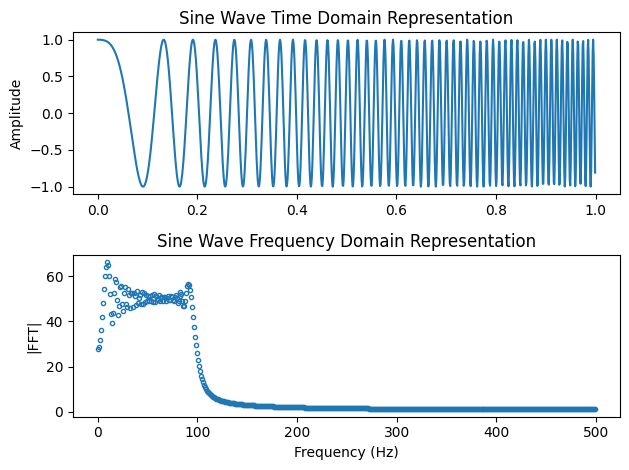

In [97]:
# Chirp FFT

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(time, chirp)
ax1.title.set_text("Sine Wave Time Domain Representation")
ax1.set_ylabel("Amplitude")
fig.tight_layout()

# ax2.stem(N*fftfreq(N, 1)[:np.round(N//2)], np.abs(fft(chirp))[:(N//2)], basefmt='b-')
ax2.plot(N*fftfreq(N, 1)[:np.round(N//2)], np.abs(fft(chirp))[:(N//2)], '.', markerfacecolor='none')
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("|FFT|")
ax2.title.set_text("Sine Wave Frequency Domain Representation")
fig.tight_layout()

:::{note}
We can see that the chirp contains frequency information across a range of frequencies (1-100 Hz).
:::

### Short-Term Fourier Trasnform Representation

The chirp has non-constant frequency which is increasing over time. This is hard to see in the frequency representation because we have lost the time information. To represent both we can split the signal into short intervals and compute the FFT for each of them, and plot the values in time and frequency (Short-Term Fourier Trasnform/Spectrogram)

Text(0, 0.5, 'Frequency (Hz)')

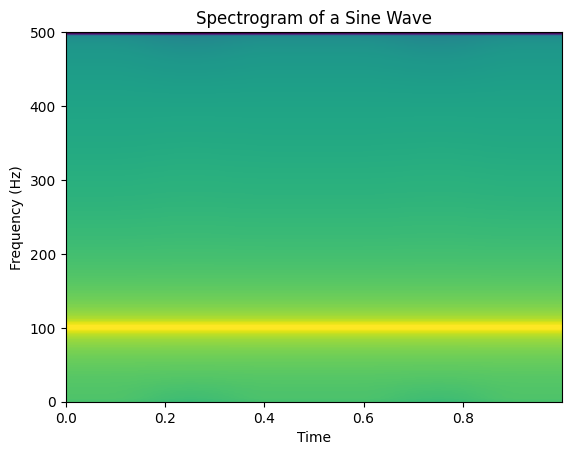

In [107]:
s, s_freq, s_t, im = plt.specgram(cw, Fs = N, xextent=[time[0],time[-1]])
plt.title("Spectrogram of a Sine Wave")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

:::{note}
Since the frequency is constant we observe a horizontal bar at 100Hz.
:::

Text(0, 0.5, 'Frequency (Hz)')

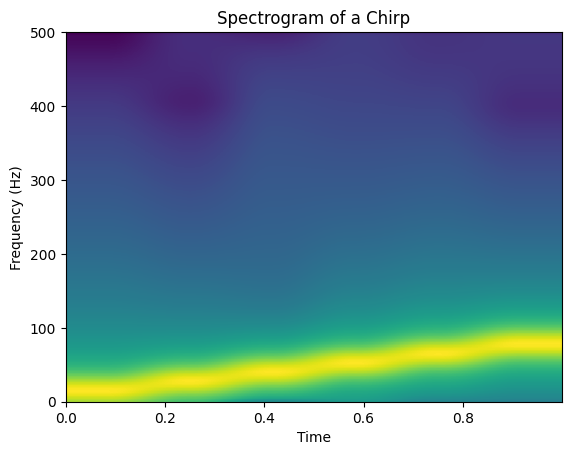

In [106]:
s, s_freq, s_t, im = plt.specgram(chirp, Fs = N, xextent=[time[0],time[-1]])
plt.title("Spectrogram of a Chirp")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

:::{note}
We observe the linear increase of frequency over time.
:::

In [108]:
from scipy.io import wavfile

In [110]:
# reading background data
samplerate, signal = wavfile.read('92301007.wav')

Text(0, 0.5, 'Frequency (Hz)')

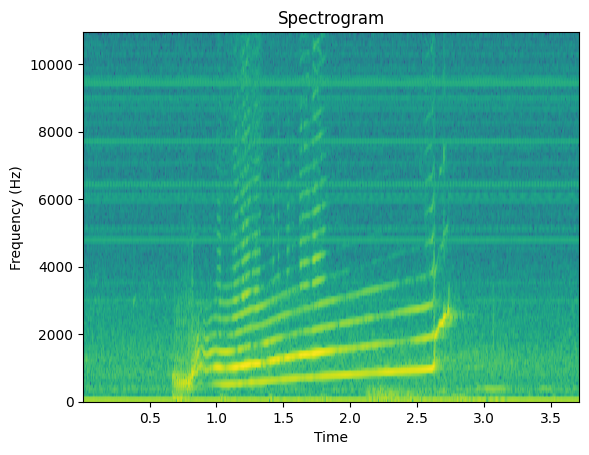

In [111]:
s, s_freq, s_t, im = plt.specgram(signal, Fs = samplerate)
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

In [103]:

# from scipy.signal import ShortTimeFFT
#SFT = ShortTimeFFT(w, hop=10, fs=1/T_x, mfft=200, scale_to='magnitude')
#SFT = ShortTimeFFT()
#Sx = SFT.stft(y)

In [17]:
# plt.pcolormesh(t, freq, s)

In [18]:
# F, t, Sxx = signal.spectrogram(y,freq)

In [19]:
#print(Sxx.shape)#

In [20]:
# plt.pcolormesh(t,F,Sxx)

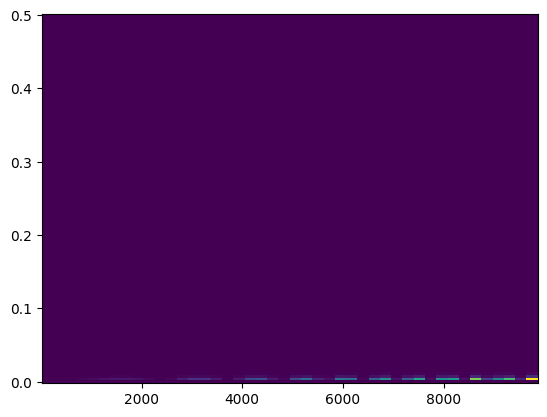

In [ ]:
F, t, Sxx = signal.spectrogram()
plt.pcolormesh(t,F,Sxx)

## Impulse

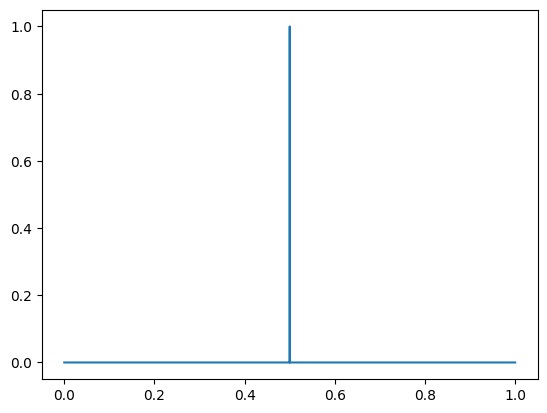

In [ ]:
y = sp.signal.unit_impulse(len(time), round(len(time)/2))
plt.plot(time, y,)

(array([[8.42949754e+01, 8.21833951e+01, 7.82467922e+01, ...,
         4.82079899e+01, 1.12079015e+00, 3.01463647e+01],
        [4.26998167e+01, 4.16490321e+01, 3.96773146e+01, ...,
         2.88204738e+01, 6.18692055e+00, 2.02603807e+01],
        [4.56725284e-04, 6.15207579e-04, 9.41290033e-04, ...,
         1.67210829e-01, 3.31692645e-01, 2.39214007e-01],
        ...,
        [3.57525139e-14, 3.47786047e-14, 3.30303611e-14, ...,
         1.15904812e-14, 6.50118281e-16, 7.28048378e-15],
        [8.93145056e-15, 8.68834741e-15, 8.25204796e-15, ...,
         2.98012496e-15, 3.71968436e-16, 1.94635401e-15],
        [3.54592293e-20, 1.63541416e-19, 4.53523169e-19, ...,
         5.69887540e-17, 1.41035905e-16, 8.59172827e-17]], shape=(129, 77)),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.14843

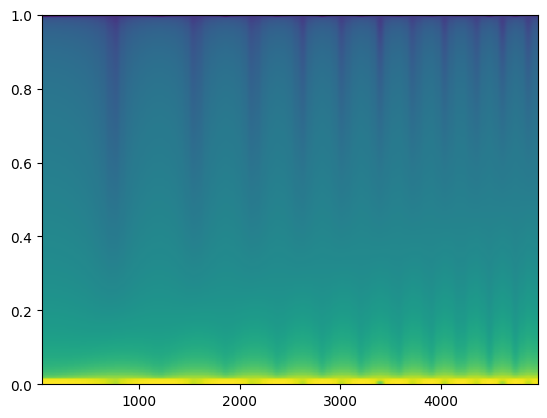

In [ ]:
plt.specgram(y)

(array([[8.42949754e+01, 8.21833951e+01, 7.82467922e+01, ...,
         4.82079899e+01, 1.12079015e+00, 3.01463647e+01],
        [4.26998167e+01, 4.16490321e+01, 3.96773146e+01, ...,
         2.88204738e+01, 6.18692055e+00, 2.02603807e+01],
        [4.56725284e-04, 6.15207579e-04, 9.41290033e-04, ...,
         1.67210829e-01, 3.31692645e-01, 2.39214007e-01],
        ...,
        [3.57525139e-14, 3.47786047e-14, 3.30303611e-14, ...,
         1.15904812e-14, 6.50118281e-16, 7.28048378e-15],
        [8.93145056e-15, 8.68834741e-15, 8.25204796e-15, ...,
         2.98012496e-15, 3.71968436e-16, 1.94635401e-15],
        [3.54592293e-20, 1.63541416e-19, 4.53523169e-19, ...,
         5.69887540e-17, 1.41035905e-16, 8.59172827e-17]], shape=(129, 77)),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.14843

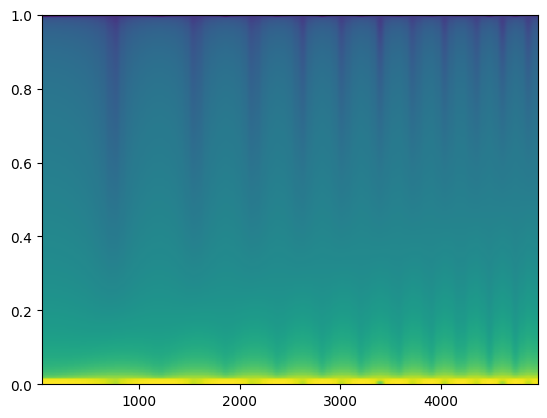

In [ ]:
plt.specgram(y)